# Modulo 3: CRISP DM - Entendimiento de los datos

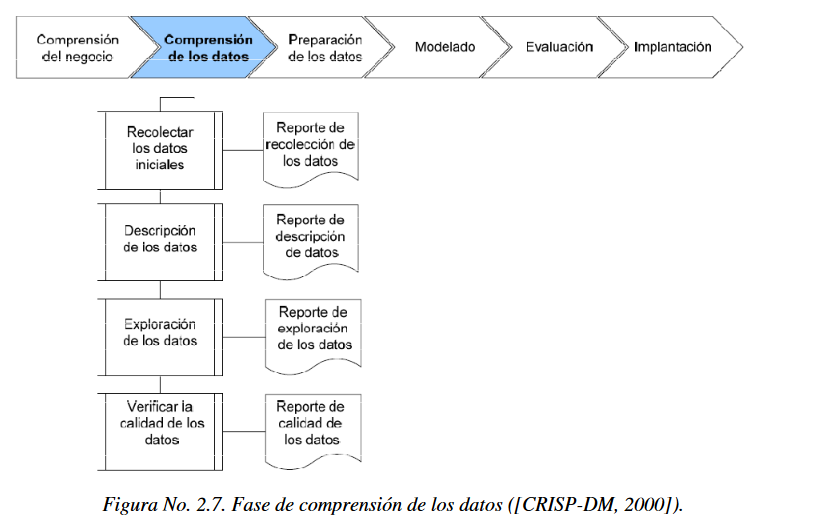

In [1]:
from IPython.display import Image
Image("../Images/crisp_dm_2.png")

## Clase calidad de datos

Para contextualizarnos un poco, imagina que conseguiste el trabajo de tus sueños, ahora haces parte del equipo de Business Intelligence en Meetup.com una reconocida empresa dedicada a conectar gente. Sin embargo, estás a prueba y debes empezar a dar resultados pronto, pero aún no conoces la compañía y su funcionamiento interno.

Tu 1ª tarea es hacer un tablero para hacer seguimiento a los principales indicadores de desempeño de la compañía, tales como ventas, costo de conversión, tasa de deserción de clientes. Tienes una semana para presentar una propuesta y no tienes idea de cómo empezar. ¿Qué harías?

Lo más común es que pienses que antes de empezar necesitas que alguien que te enseñe cuáles son las tablas que tienen la información disponible, cómo acceder a ellas, que información contienen. En la mayoría de los casos las personas estarán ocupadas y no podrán ayudarte y al final todo el tiempo que esa persona dedique para explicarte, podría usarse para otra cosa qué agregue valor en la compañía. Tú necesitas completar tu trabajo rápido.

Otra analogía para que entiendas por qué estamos haciendo este ejercicio es la siguiente: imagínate que eres un viajero y necesitas llegar a tu destino. ¿Qué harías? Puedes preguntar, puedes explorar y perderte. Sin embargo, cada vez que te pierdes, pierdes tiempo y esto hará que llegues más tarde a tu destino. ¿Qué tal si tuvieras un mapa a la mano, inclusive Google Maps? Eso facilitaría mucho el viaje.

De eso se trata este ejercicio, vamos a construir un mapa para nuestro trabajo, nos ayudará a saber qué tablas utilizar para calcular bien los indicadores y evitará que nos equivoquemos o demoremos cuando no sepamos.

In [1]:
import MySQLdb as mariadb

In [2]:
mariadb_connection = mariadb.connect(user='root', password='', database='meetup')

In [3]:
import pandas as pd

Ahora nos Ahora nos interesa entender que hay en cada variable, antes de empezar diseñaremos el diccionario en sheets.


lo haremos con el siguiente código (disponible en “tab 3 venues, Excel 2. Diccionario” ) 

In [5]:
pd.read_sql("select distinct city from meetup.venues;",mariadb_connection)

,city
0,New York
1,Chicago
2,San Francisco
3,East Chicago
4,New York City
...,...
250,"New York, 10038"
251,"New York, NY 10004"
252,"New York, 12498"
253,"Chicago, IL 60622"


De acá surgen ideas como: 1. Homologar los valores de algunas variables, es el caso de la variable “city”, donde podemos homologar por ejemplo ciudades como “new york” . esto lo podemos hacer con el comando LIKE

Fijate cuántos tipos de new york hay

In [7]:
pd.read_sql("select distinct city from meetup.venues where city like '%New York%';", mariadb_connection)

,city
0,New York
1,New York City
2,West New York
3,"New York, NY 10025"
4,"West Village, New York City"
...,...
124,New York - 10018
125,New York - 10012
126,"New York, 10038"
127,"New York, NY 10004"


Y fíjate como los podemos homologar usando el operador CASE WHEN 

In [9]:
pd.read_sql("""
select distinct city, case when city like '%New York%' then 'New York' end as city_mad from meetup.venues
""", mariadb_connection)

,city,city_mad
0,New York,New York
1,Chicago,None
2,San Francisco,None
3,East Chicago,None
4,New York City,New York
...,...,...
250,"New York, 10038",New York
251,"New York, NY 10004",New York
252,"New York, 12498",New York
253,"Chicago, IL 60622",None


Ahora nos interesa saber cuántos meetup se han celebrado en new york.

In [11]:
pd.read_sql("""
select distinct case when city like '%New York%' then 'New York' end as city_mad , count(*)
from meetup.venues
group by city_mad
;
""", mariadb_connection)

,city_mad,count(*)
0,None,50787
1,New York,56306


Claro nos interesa saber sobre todos, no solo sobre New York, vamos a utilizar la tabla cities para saber cuales son las ciudades que existen. Y vamos a utilizar Excel para escribir el código que necesitamos, en el tab “3 venues”, línea 20 a 32, está el código. 

In [12]:
pd.read_sql("""
select distinct 
case 
when city like '%West New York%' then 'West New York'
when city like '%New York%' then 'New York'
when city like '%New York Mills%' then 'New York Mills'
when city like '%East Chicago%' then 'East Chicago'
when city like '%New York Mills%' then 'New York Mills'
when city like '%North Chicago%' then 'North Chicago'
when city like '%West Chicago%' then 'West Chicago'
when city like '%Chicago Heights%' then 'Chicago Heights'
when city like '%Chicago Ridge%' then 'Chicago Ridge'
when city like '%Chicago%' then 'Chicago'
when city like '%South San Francisco%' then 'South San Francisco'
when city like '%San Francisco%' then 'San Francisco'
when city like '%Chicago Park%' then 'Chicago Park'
end as city_mad,
count(*)
from meetup.venues
group by city_mad
;
""",mariadb_connection)

,city_mad,count(*)
0,Chicago,26008
1,Chicago Heights,17
2,Chicago Ridge,14
3,East Chicago,2
4,New York,56298
5,North Chicago,1
6,San Francisco,24603
7,South San Francisco,114
8,West Chicago,28
9,West New York,8


Ahora que conocemos el output, vamos a limpiar un poco el código.

In [13]:
pd.read_sql("""
select distinct 
case 
when city like '%New York%' then 'New York'
when city like '%Chicago%' then 'Chicago'
when city like '%San Francisco%' then 'San Francisco'
end as city_mad,
count(*)
from meetup.venues
group by city_mad
;

""",mariadb_connection)

,city_mad,count(*)
0,Chicago,26070
1,New York,56306
2,San Francisco,24717


Ahora tenemos claridad sobre la frecuencia de los venues por ciudad.
Vamos a sacar estas cuentas para el resto de variables que nos interesan.


In [17]:
pd.read_sql("""
select distinct country, count(*) from meetup.venues group by country;
""",mariadb_connection)

,country,count(*)
0,us,107093


In [16]:
pd.read_sql("""
select distinct localized_country_name, count(*) from meetup.venues group by localized_country_name;
""",mariadb_connection)

,localized_country_name,count(*)
0,USA,107093


en el caso de venue name nos damos cuenta que es una dirección y por lo tanto no necesitamosni homologarla ni hacer un diccionario de frecuencias de este campo.

In [18]:
pd.read_sql("""
select distinct venue_name, count(*) from meetup.venues group by venue_name;
""",mariadb_connection)

,venue_name,count(*)
0,,18
1,# 1 TRAIN STATION ON 207TH STREET,1
2,#6 Train,1
3,#AsianElements Anniversary Yacht aka Summer of...,1
4,#AsianElements Halloween Yacht,1
...,...,...
62843,[freespace],3
62844,[movement room] @ [freespace],1
62845,^^^Timezone: Pacific Daylight Time (SFO),1
62846,"__th floor, studio _ (Nola Studios)",1


In [19]:
pd.read_sql("""
select distinct rating, count(*) from meetup.venues group by rating;
""",mariadb_connection)

,rating,count(*)
0,0,48915
1,1,293
2,2,379
3,3,2371
4,4,17916
5,5,37219


In [20]:
pd.read_sql("""
select distinct state, count(*) from meetup.venues group by state;
""",mariadb_connection)

,state,count(*)
0,AL,5
1,CA,21313
2,CT,2
3,FL,2
4,IL,21990
5,IN,2
6,Ka,1
7,LA,1
8,MD,1
9,MN,1
